# AutoEncoder_MNIST_HighCompression#
### In this example I just want to illustrate the use of "transposedConvLayer" to make an Autoencoder. In this example Max Pool Layers are being used in order to obtain a grater compression.
#### Network ####
Input(28,28,1) - Conv(3,3)  - Maxp (2,2) - Conv(3,3) - Maxp(2,2) - Out (12,12,5) - 2xTransposedConv(2,2) - Output (28,28,1)
#### Note ####
Converges to a nice solution almost always

In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import importlib
import timeit
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.6.9
['/home/adria/anaconda3/lib/python36.zip', '/home/adria/anaconda3/lib/python3.6', '/home/adria/anaconda3/lib/python3.6/lib-dynload', '', '/home/adria/.local/lib/python3.6/site-packages', '/home/adria/anaconda3/lib/python3.6/site-packages', '/home/adria/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/GITHUB/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [4]:
# Load Mnist
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', version=1, cache=True)
trX, teX, trY, teY = train_test_split(mnist.data / 255.0, mnist.target.astype("int0"), test_size = 0.33)

# Data vectors are expected in columns
trX = trX.transpose();
teX = teX.transpose();

In [5]:
# dataset properties
print("Values per Image training:", trX.shape[0])
print("Number of images for training:", trX.shape[1])
# dataset properties
print("Values per Image testing:", teX.shape[0])
print("Number of images for testing:", teX.shape[1])
from matplotlib import pyplot as plt
%matplotlib inline 

Values per Image training: 784
Number of images for training: 46900
Values per Image testing: 784
Number of images for testing: 23100


In [6]:
#subsample if necessary
trainSampleSize = 46900;
trXSub = trX[:,0:trainSampleSize]

In [6]:
# importlib.reload(pyb) # For some reason, this appears not to be working

In [7]:
deepAE = pyb.AutoEncoderExample6(28,28,1)


Conv In Depth: 1 In Height: 28 In Width: 28 Out Depth: 16 Out Height: 28 Out Width: 28
Maxp In Depth: 16 In Height: 28 In Width: 28 Out Depth: 16 Out Height: 14 Out Width: 14
Conv In Depth: 16 In Height: 14 In Width: 14 Out Depth: 4 Out Height: 14 Out Width: 14
Maxp In Depth: 4 In Height: 14 In Width: 14 Out Depth: 4 Out Height: 7 Out Width: 7
Tran In Depth: 4 In Height: 7 In Width: 7 Out Depth: 16 Out Height: 14 Out Width: 14
Tran In Depth: 16 In Height: 14 In Width: 14 Out Depth: 1 Out Height: 28 Out Width: 28


In [8]:
# train and test (prints some result and returns test results)
tic = timeit.default_timer();
deepAE.Train(trXSub,trXSub,0.0005,15)
toc = timeit.default_timer();
print(toc-tic)

Loss of a given sample at epoch: 0
3.36824
Loss of a given sample at epoch: 1
7.10246
Loss of a given sample at epoch: 2
5.64179
Loss of a given sample at epoch: 3
5.322
Loss of a given sample at epoch: 4
5.52665
Loss of a given sample at epoch: 5
1.04919
Loss of a given sample at epoch: 6
4.67318
Loss of a given sample at epoch: 7
3.40239
Loss of a given sample at epoch: 8
2.45644
Loss of a given sample at epoch: 9
4.15205
Loss of a given sample at epoch: 10
2.77959
Loss of a given sample at epoch: 11
8.03035
Loss of a given sample at epoch: 12
4.32144
Loss of a given sample at epoch: 13
5.3472
Loss of a given sample at epoch: 14
3.65778
546.1024424880015


testing:


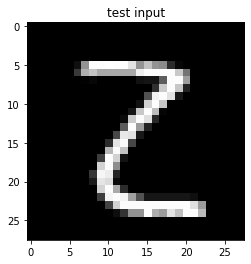

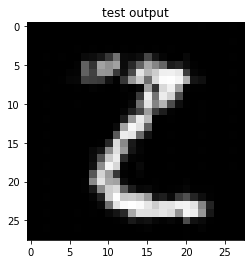

In [9]:
sampleNum = 4
deepAEOut = deepAE.Test(teX[:,sampleNum])
plt.title("test input")
plt.imshow(np.reshape(teX[:,sampleNum],(28,28)), interpolation='nearest', cmap='gray')
plt.show()
plt.title("test output")
plt.imshow(np.reshape(deepAEOut,(28,28)), interpolation='nearest', cmap='gray')
plt.show()

In [10]:
deepAEOut

array([[1.39049475e-03],
       [2.64082708e-04],
       [4.02765548e-03],
       [9.95996230e-05],
       [1.25968952e-03],
       [3.21903939e-04],
       [4.04419525e-03],
       [1.16532852e-04],
       [1.15588045e-03],
       [1.73236231e-03],
       [4.65917386e-03],
       [2.98662411e-04],
       [3.95295025e-03],
       [1.02459213e-04],
       [2.83359497e-03],
       [3.10927153e-05],
       [3.92812973e-03],
       [2.06369609e-04],
       [3.44511976e-03],
       [5.68176935e-05],
       [1.62482441e-03],
       [1.93266739e-04],
       [4.00171409e-03],
       [7.77570620e-05],
       [1.78567215e-03],
       [2.04926720e-04],
       [4.05885496e-03],
       [8.03137604e-05],
       [8.05678106e-04],
       [8.20234468e-04],
       [6.09668082e-04],
       [1.21305803e-04],
       [6.51613211e-04],
       [9.02434618e-04],
       [5.09029205e-04],
       [1.14583937e-04],
       [3.60628873e-04],
       [3.29087123e-03],
       [2.94661569e-04],
       [1.15193039e-04],
